# **Fake News (Group 3)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

df = pd.read_csv('kaggle_fake_train.csv')

In [ ]:
df.shape

(20800, 5)

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [ ]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

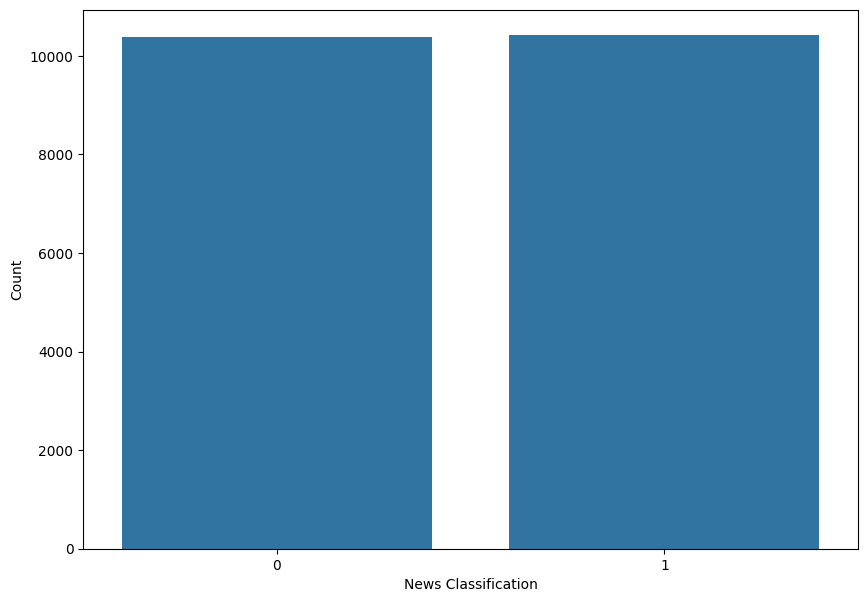

In [ ]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

In [ ]:
print(df.shape)

(20800, 4)


In [ ]:
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [ ]:
news = df.copy()

In [ ]:
news.reset_index(inplace=True)

In [ ]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

 # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [ ]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 5000)

In [ ]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Extracting dependent variable from the dataset
y = news['label']

In [ ]:
#Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
#Multinomial Naive Bayes
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1a = accuracy_score(y_test, nb_y_pred)
score2a = precision_score(y_test, nb_y_pred)
score3a = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1a*100,2)))
print("Precision score is: {}".format(round(score2a,2)))
print("Recall score is: {}".format(round(score3a,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[1823,  217],
       [ 143, 1474]])

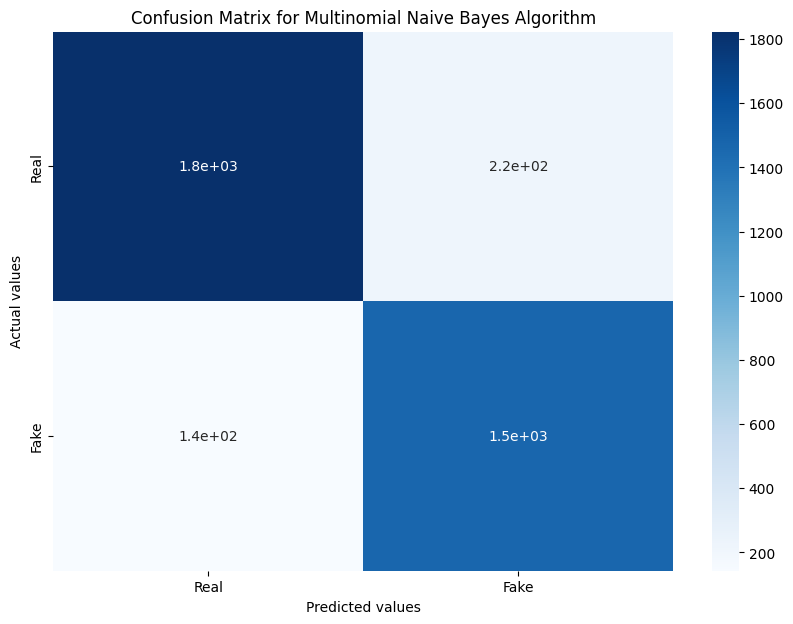

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.59% with alpha value as 0.3


In [ ]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X1= tfidf_vectorizer.fit_transform(corpus).toarray()

In [ ]:
X1.shape

(18285, 5000)

In [ ]:
X1[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Extracting dependent variable from the dataset
y1= news['label']

In [ ]:
#Model Building

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [ ]:
#Multinomial Naive Bayes
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(X1_train, y1_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred1 = nb_classifier1.predict(X1_test)

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1b = accuracy_score(y1_test, nb_y_pred1)
score2b = precision_score(y1_test, nb_y_pred1)
score3b = recall_score(y1_test, nb_y_pred1)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1b*100,2)))
print("Precision score is: {}".format(round(score2b,2)))
print("Recall score is: {}".format(round(score3b,2)))

---- Scores ----
Accuracy score is: 88.87%
Precision score is: 0.92
Recall score is: 0.82


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm1 = confusion_matrix(y1_test, nb_y_pred1)

In [ ]:
nb_cm1

array([[1924,  116],
       [ 291, 1326]])

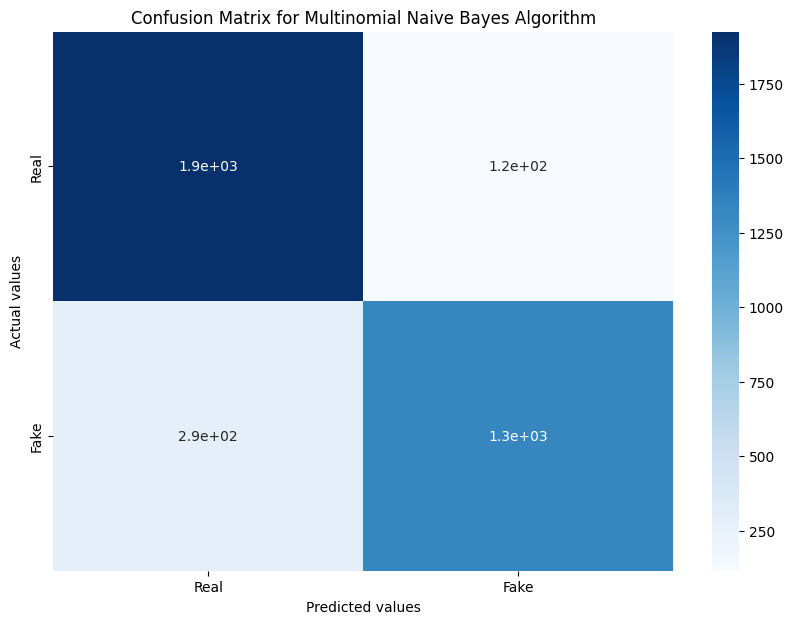

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm1, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier1 = MultinomialNB(alpha=i)
  temp_classifier1.fit(X1_train, y1_train)
  temp_y_pred1 = temp_classifier1.predict(X1_test)
  score11 = accuracy_score(y1_test, temp_y_pred1)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score11*100,2)))
  if score11>best_accuracy:
    best_accuracy = score11
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 88.79%
Accuracy score for alpha=0.2 is: 88.93%
Accuracy score for alpha=0.3 is: 89.01%
Accuracy score for alpha=0.4 is: 89.06%
Accuracy score for alpha=0.5 is: 89.03%
Accuracy score for alpha=0.6 is: 88.93%
Accuracy score for alpha=0.7 is: 88.79%
Accuracy score for alpha=0.8 is: 88.82%
Accuracy score for alpha=0.9 is: 88.84%
Accuracy score for alpha=1.0 is: 88.87%
--------------------------------------------
The best accuracy is 89.06% with alpha value as 0.4


**Logistic with BOW**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier1 = LogisticRegression(random_state=0)
lr_classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
lr_y_pred1 = lr_classifier1.predict(X_test)

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1c = accuracy_score(y_test, lr_y_pred1)
score2c = precision_score(y_test, lr_y_pred1)
score3c = recall_score(y_test, lr_y_pred1)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1c*100,2)))
print("Precision score is: {}".format(round(score2c,2)))
print("Recall score is: {}".format(round(score3c,2)))

---- Scores ----
Accuracy score is: 93.52%
Precision score is: 0.89
Recall score is: 0.97


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm1 = confusion_matrix(y_test, lr_y_pred1)

In [ ]:
lr_cm1

array([[1850,  190],
       [  47, 1570]])

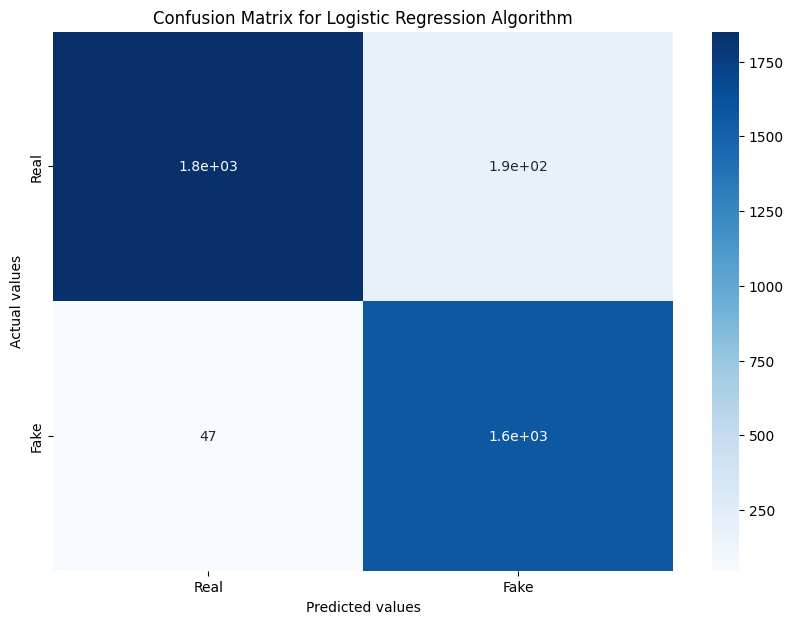

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm1, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier2 = LogisticRegression(C=i, random_state=0)
  temp_classifier2.fit(X_train, y_train)
  temp_y_pred2 = temp_classifier2.predict(X_test)
  score22 = accuracy_score(y_test, temp_y_pred2)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score22*100,2)))
  if score22>best_accuracy:
    best_accuracy = score22
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.86%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.38%
Accuracy score for C=0.5 is: 93.49%
Accuracy score for C=0.6 is: 93.49%
Accuracy score for C=0.7 is: 93.55%
Accuracy score for C=0.8 is: 93.63%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.52%
--------------------------------------------
The best accuracy is 93.63% with C value as 0.8


In [ ]:
classifier1 = LogisticRegression(C=0.8, random_state=0)
classifier1.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

**Logistic with TF-IDF**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier2 = LogisticRegression(random_state=0)
lr_classifier2.fit(X1_train, y1_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
lr_y_pred2 = lr_classifier2.predict(X1_test)

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1d = accuracy_score(y1_test, lr_y_pred2)
score2d = precision_score(y1_test, lr_y_pred2)
score3d = recall_score(y1_test, lr_y_pred2)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1d*100,2)))
print("Precision score is: {}".format(round(score2d,2)))
print("Recall score is: {}".format(round(score3d,2)))

---- Scores ----
Accuracy score is: 92.64%
Precision score is: 0.87
Recall score is: 0.98


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm2 = confusion_matrix(y1_test, lr_y_pred2)

In [ ]:
lr_cm2

array([[1802,  238],
       [  31, 1586]])

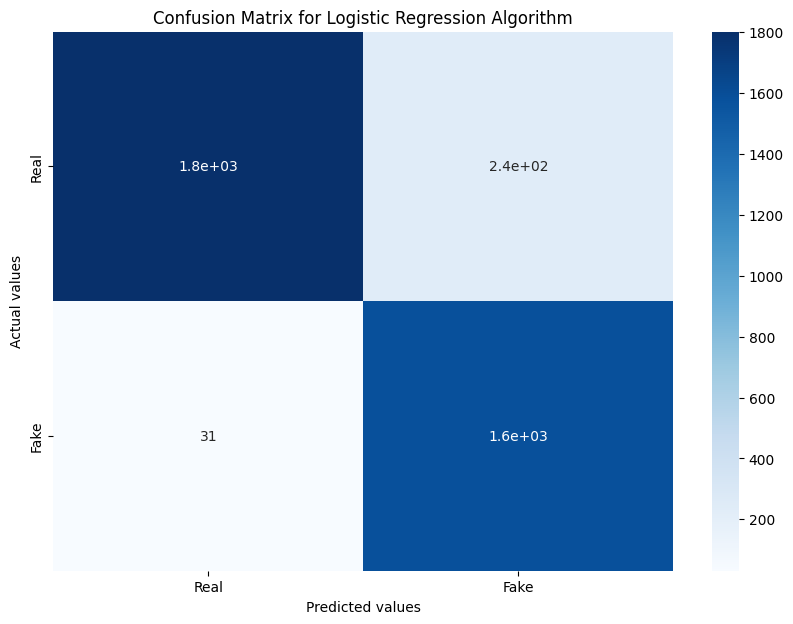

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm2, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier3 = LogisticRegression(C=i, random_state=0)
  temp_classifier3.fit(X1_train, y1_train)
  temp_y_pred3 = temp_classifier3.predict(X1_test)
  score33 = accuracy_score(y1_test, temp_y_pred3)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score33*100,2)))
  if score33>best_accuracy:
    best_accuracy = score22
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 90.43%
Accuracy score for C=0.2 is: 90.98%
Accuracy score for C=0.3 is: 91.3%
Accuracy score for C=0.4 is: 91.55%
Accuracy score for C=0.5 is: 91.74%
Accuracy score for C=0.6 is: 92.18%
Accuracy score for C=0.7 is: 92.29%
Accuracy score for C=0.8 is: 92.34%
Accuracy score for C=0.9 is: 92.59%
Accuracy score for C=1.0 is: 92.64%
--------------------------------------------
The best accuracy is 93.52% with C value as 0.1


In [ ]:
classifier2 = LogisticRegression(C=0.8, random_state=0)
classifier2.fit(X1_train, y1_train)

LogisticRegression(C=0.8, random_state=0)

In [ ]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier2.predict(temp)

In [ ]:
# Importing test dataset
df_test = pd.read_csv('kaggle_fake_train.csv')

In [ ]:
df_test.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
news_title = df_test['title']

In [ ]:
news_title.shape

(20800,)

**Random Headlines Selected by Model**

In [ ]:
# For generating random integer
from random import randint

In [ ]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Donald Trump, Colombia, Fidel Castro: Your Wednesday Briefing - The New York Times
Prediction: This is a REAL news.


In [ ]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Celebrities Line Up Hoping to Be Pardoned by Obama Before He Leaves Office
Prediction: This is a REAL news.


In [ ]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: The Alignment Between These Ancient Sites Will Blow Your Mind
Prediction: This is a FAKE news!


In [ ]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Bombing in Turkey Kills 13 Soldiers and Wounds Dozens More - The New York Times
Prediction: This is a REAL news.
